In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator
from matplotlib.gridspec import GridSpec
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.covariance import EmpiricalCovariance
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from mpl_toolkits.mplot3d import Axes3D
from glob import glob
import seaborn as sns
from scipy import stats, signal
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interact, fixed

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # Ëß£ÂÜ≥‰∏≠ÊñáÊòæÁ§∫ÈóÆÈ¢ò
plt.rcParams['axes.unicode_minus'] = False    # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò

# 1. Â§ÑÁêÜÊñá‰ª∂Âàó‰∏çÂåπÈÖçÈóÆÈ¢ò

## 1.1 ÂéªÈô§Â∞æÈÉ®Â§ö‰ΩôÂ≠óÁ¨¶

In [2]:
files = glob("../datas/NPIÊï∞ÊçÆÊî∂ÈõÜ/LG-1/watchdata/*.csv")

In [12]:
def clean_csv(input_path, output_path=None, encoding='utf-8'):
    cleaned_lines = []
    # ËØªÂèñÂπ∂Ê∏ÖÁêÜÊØè‰∏ÄË°å
    with open(input_path, 'r', encoding=encoding) as f:
        for line in f:
            # ÂéªÈô§Ë°åÂ∞æÊç¢Ë°åÁ¨¶ÂíåÂ§ö‰ΩôÈÄóÂè∑ÔºàÂåÖÊã¨ËøûÁª≠ÈÄóÂè∑Ôºâ
            cleaned_line = line.rstrip('\n')[:-2]
            cleaned_lines.append(cleaned_line)

    # ÂÜôÂÖ•Ê∏ÖÁêÜÂêéÁöÑÊñá‰ª∂ÔºàÂèØÈÄâÔºâ
    if output_path:
        with open(output_path, 'w', encoding='utf8') as f:
            f.write('\n'.join(cleaned_lines))

In [13]:
for file in files:
    clean_csv(file, output_path=os.path.join("../datas/NPIÊï∞ÊçÆÊî∂ÈõÜ/LG-1/watchdata_new", os.path.basename(file)), encoding='gbk')

## 1.2 ÈáçÊñ∞Ëé∑ÂèñÊñá‰ª∂

In [26]:
# files = glob("../datas/NPIÊï∞ÊçÆÊî∂ÈõÜ/LG-1/watchdata_new/*.csv")
# dfs = [pd.read_csv(file, encoding='utf8', on_bad_lines='skip') for file in files]
# df = pd.concat(dfs, ignore_index=True)
# df.to_csv("../datas/NPIÊï∞ÊçÆÊî∂ÈõÜ/LG-1/watchdata.csv", index=False, encoding='utf8')
df = pd.read_csv("../datas/NPIÊï∞ÊçÆÊî∂ÈõÜ/LG-1/watchdata.csv")
df.columns = [x.lower() for x in df.columns]

In [28]:
df_use = df[['time', '4_halfatlasresult', '2_fullatlasresult', '1_fullatlasresult', '4_fullatlasresult', 's2s3installptid', 's2s3assystation', 's2s3assyplatformid', 'lock_platformid', 'lockscrewstation', 'lockscrewplatformid', 'maxpressspkdata', 'maxpresschgdata', 'bracketmaxpress', 'spk screw 4_half finaltorque', 'spk screw 4_half finalangle', 'spk screw 4 prevailingtorquemax', 'spk screw 4 prevailingtorquemaxangle', 'spk screw 4_half realangle', 'spk screw 4_half torqueat630', 'spk screw 4_half prev torque retest logic', 'kc screw 2_full finaltorque', 'kc screw 2_full finalangle', 'kc screw 2_full prevailingtorquemax', 'kc screw 2_full prevailingtorquemaxangle', 'kc screw 2_full realangle', 'kc screw 2_full torqueat630', 'kc screw 2_full prev torque retest logic', 'kc screw 1_full finaltorque', 'kc screw 1_full finalangle', 'kc screw 1_full prevailingtorquemax', 'kc screw 1_full prevailingtorquemaxangle', 'kc screw 1_full realangle', 'kc screw 1_full torqueat630', 'kc screw 1_full prev torque retest logic', 'spk screw 4_full finaltorque', 'spk screw 4_full finalangle', 'spk screw 4_full totalangle', 'spk screw 4_full prev torque retest logic']]

In [31]:
df_use[['4_halfatlasresult', '2_fullatlasresult', '1_fullatlasresult', '4_fullatlasresult']].value_counts()

4_halfatlasresult  2_fullatlasresult  1_fullatlasresult  4_fullatlasresult
OK                 OK                 OK                 OK                   7640
                                      Toss               OK                     14
                   Toss               OK                 OK                     12
                   OK                 OK                 Toss                    2
                                      NG                 OK                      1
                                      OK                 NG                      1
                   Toss               Toss               OK                      1
Name: count, dtype: int64

In [33]:
# df_use.iloc[:60].to_csv("../datas/NPIÊï∞ÊçÆÊî∂ÈõÜ/LG-1/temp.csv", index=False)
df_use.describe()

s2s3assystation  s2s3assyplatformid  lockscrewstation  \
count      7847.000000         7847.000000            7861.0   
mean          2.011469            1.009685               4.0   
std           0.106486            0.097942               0.0   
min           2.000000            1.000000               4.0   
25%           2.000000            1.000000               4.0   
50%           2.000000            1.000000               4.0   
75%           2.000000            1.000000               4.0   
max           3.000000            2.000000               4.0   

       lockscrewplatformid  maxpressspkdata  maxpresschgdata  bracketmaxpress  \
count          7861.000000      7562.000000      7562.000000      7554.000000   
mean              1.012339        19.631248         7.846818        11.493580   
std               0.110402         0.127820         0.211144         0.815064   
min               1.000000        18.470000         7.000000         0.080000   
25%               1.000000        19.540000         7.830000        11.160000   
50%               1.000000        19.620000         7.890000        11.700000   
75%               1.000000        19.720000         7.940000        12.040000   
max               2.000000        20.170000         9.940000        17.170000   

       spk screw 4_half finaltorque  spk screw 4_half finalangle  \
count                   7671.000000                  7671.000000   
mean                       0.171872                   907.780336   
std                        0.000202                   157.948214   
min                        0.171600                  -167.400000   
25%                        0.171700                   810.540000   
50%                        0.171850                   914.760000   
75%                        0.172000                  1015.740000   
max                        0.172900                  1292.220000   

       spk screw 4 prevailingtorquemax  ...  kc screw 1_full finalangle  \
count                      7671.000000  ...                 7671.000000   
mean                          0.076923  ...                  863.683223   
std                           0.043681  ...                  142.160454   
min                           0.019550  ...                  -89.640000   
25%                           0.045150  ...                  757.080000   
50%                           0.065850  ...                  861.840000   
75%                           0.095100  ...                  963.900000   
max                           0.344150  ...                 1320.840000   

       kc screw 1_full prevailingtorquemax  \
count                          7671.000000   
mean                              0.098077   
std                               0.076047   
min                               0.016800   
25%                               0.048700   
50%                               0.072350   
75%                               0.115450   
max                               0.344750   

       kc screw 1_full prevailingtorquemaxangle  kc screw 1_full realangle  \
count                               7671.000000                7671.000000   
mean                                 506.974118                1136.806437   
std                                  214.653849                 142.062713   
min                                 -245.160000                 181.440000   
25%                                  495.180000                1030.320000   
50%                                  603.720000                1135.080000   
75%                                  628.020000                1237.140000   
max                                  629.640000                1593.540000   

       kc screw 1_full torqueat630  kc screw 1_full prev torque retest logic  \
count                  7671.000000                               7671.000000   
mean                      0.091078                                  0.002477   
std                       0.078332                   

# 2. ÂºÇÂ∏∏ÁõëÊµã

## 2.1 ÊñπÊ°à‰∏Ä

In [ ]:
class ScrewDriverMonitor:
    def __init__(self, df):
        self.df = df
        self.batch_state = {}
        self.thresholds = {
            'torque_variance': 0.1,
            'angle_variance': 0.05,
            'success_rate': 0.95,
            'wear_score': 0.7
        }
    
    def preprocess_data(self):
        """Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ"""
        # Á≠õÈÄâÊúâÊïàÊï∞ÊçÆ
        valid_columns = [
            'time', '4_halfatlasresult', '2_fullatlasresult', '1_fullatlasresult', 
            '4_fullatlasresult', 's2s3installptid', 'maxpressspkdata', 
            'spk screw 4_half finaltorque', 'spk screw 4_half finalangle',
            'kc screw 1_full finaltorque', 'kc screw 1_full finalangle',
            'kc screw 2_full finaltorque', 'kc screw 2_full finalangle',
            'spk screw 4_full finaltorque', 'spk screw 4_full finalangle'
        ]
        
        self.df = self.df[valid_columns]
        self.df['time'] = pd.to_datetime(self.df['time'])
        
        # ÂéªÈô§Êó†ÊïàËÆ∞ÂΩï
        self.df = self.df.dropna(subset=['s2s3installptid'])
        
        return self.df
    
    def extract_features(self, group):
        """ÊèêÂèñÁâπÂæÅÂèÇÊï∞"""
        features = {}
        
        # Êâ≠Áü©Áõ∏ÂÖ≥ÁâπÂæÅ
        torque_cols = ['spk screw 4_half finaltorque', 'kc screw 2_full finaltorque', 'kc screw 1_full finaltorque', 'spk screw 4_full finaltorque']
        
        torques = group[torque_cols].values.flatten()
        features['mean_torque'] = np.nanmean(torques)
        features['std_torque'] = np.nanstd(torques)
        features['torque_cv'] = features['std_torque'] / features['mean_torque'] if features['mean_torque'] != 0 else 0
        
        # ËßíÂ∫¶Áõ∏ÂÖ≥ÁâπÂæÅ
        angle_cols = ['spk screw 4_half finalangle', 'kc screw 2_full finalangle', 'kc screw 1_full finalangle', 'spk screw 4_full finalangle']
        
        angles = group[angle_cols].values.flatten()
        features['mean_angle'] = np.nanmean(angles)
        features['std_angle'] = np.nanstd(angles)
        features['angle_cv'] = features['std_angle'] / features['mean_angle'] if features['mean_angle'] != 0 else 0
        
        # ÊàêÂäüÁéá
        result_cols = ['4_halfatlasresult', '2_fullatlasresult', '1_fullatlasresult', '4_fullatlasresult']
        success_count = sum(group[result_cols].values.flatten() == 'OK')
        features['success_rate'] = success_count / len(result_cols)
        
        return features
    
    def calculate_wear_score(self, features):
        """ËÆ°ÁÆóÁ£®ÊçüËØÑÂàÜ"""
        score = 0
        
        # Êâ≠Áü©ÂèòÂºÇÂ∫¶
        torque_score = min(features['torque_cv'] / self.thresholds['torque_variance'], 1)
        score += torque_score * 0.4
        
        # ËßíÂ∫¶ÂèòÂºÇÂ∫¶
        angle_score = min(features['angle_cv'] / self.thresholds['angle_variance'], 1)
        score += angle_score * 0.3
        
        # ÊàêÂäüÁéá
        success_score = 1 - min((1 - features['success_rate']) / (1 - self.thresholds['success_rate']), 1)
        score += success_score * 0.3
        
        return score
    
    def assess_batch_state(self, platform_id, features):
        """ËØÑ‰º∞ÊâπÊùÜÁä∂ÊÄÅ"""
        if platform_id not in self.batch_state:
            self.batch_state[platform_id] = {
                'history': [],
                'current_score': 0,
                'trend': 'stable'
            }
        
        wear_score = self.calculate_wear_score(features)
        self.batch_state[platform_id]['history'].append(wear_score)
        self.batch_state[platform_id]['current_score'] = wear_score
        
        # ËØÑ‰º∞Ë∂ãÂäø
        history = self.batch_state[platform_id]['history']
        if len(history) > 3:
            trend = np.polyfit(range(len(history)), history, 1)[0]
            self.batch_state[platform_id]['trend'] = 'worsening' if trend > 0 else 'improving'
        else:
            self.batch_state[platform_id]['trend'] = 'stable'
        
        return wear_score
    
    def generate_alert(self, platform_id):
        """ÁîüÊàêÈ¢ÑË≠¶‰ø°ÊÅØ"""
        state = self.batch_state[platform_id]
        alert_level = 'none'
        alert_msg = ''
        
        if state['current_score'] > self.thresholds['wear_score']:
            alert_level = 'critical'
            alert_msg = 'ÊâπÊùÜÁ£®Êçü‰∏•ÈáçÔºåÂª∫ËÆÆÁ´ãÂç≥Êõ¥Êç¢'
        elif state['current_score'] > 0.5:
            alert_level = 'warning'
            alert_msg = 'ÊâπÊùÜÁ£®ÊçüÂä†ÂâßÔºåÂª∫ËÆÆÂ∞ΩÂø´Ê£ÄÊü•'
        elif state['trend'] == 'worsening':
            alert_level = 'notice'
            alert_msg = 'ÊâπÊùÜÁ£®ÊçüË∂ãÂäøÊÅ∂ÂåñÔºåÂª∫ËÆÆÂÖ≥Ê≥®'
        
        return {
            'platform_id': platform_id,
            'alert_level': alert_level,
            'current_score': state['current_score'],
            'trend': state['trend'],
            'message': alert_msg
        }
    
    def monitor(self):
        """‰∏ªÁõëÊéßÂáΩÊï∞"""
        # ÂàÜÁªÑÂ§ÑÁêÜ
        for platform_id, group in self.df.groupby('s2s3installptid'):
            features = self.extract_features(group)
            wear_score = self.assess_batch_state(platform_id, features)
            alert = self.generate_alert(platform_id)
            
            # ËæìÂá∫È¢ÑË≠¶‰ø°ÊÅØ
            print(f"Âπ≥Âè∞ {platform_id} ÁõëÊéßÁªìÊûúÔºö")
            print(f"Á£®ÊçüËØÑÂàÜÔºö{wear_score:.3f}")
            print(f"Áä∂ÊÄÅË∂ãÂäøÔºö{alert['trend']}")
            print(f"È¢ÑË≠¶Á≠âÁ∫ßÔºö{alert['alert_level']}")
            print(f"Âª∫ËÆÆÔºö{alert['message']}")
            print("-" * 50)
    
    def plot_trend(self, platform_id):
        """ÁªòÂà∂Áä∂ÊÄÅË∂ãÂäøÂõæ"""
        state = self.batch_state[platform_id]
        if platform_id in self.batch_state:
            plt.figure(figsize=(10, 4))
            plt.plot(state['history'], marker='o', label='Á£®ÊçüËØÑÂàÜ')
            plt.axhline(y=self.thresholds['wear_score'], color='r', linestyle='--', label='Êõ¥Êç¢ÈòàÂÄº')
            plt.title(f'Âπ≥Âè∞ {platform_id} ÊâπÊùÜÁ£®ÊçüË∂ãÂäø')
            plt.xlabel('Ê£ÄÊµãÊ¨°Êï∞')
            plt.ylabel('Á£®ÊçüËØÑÂàÜ')
            plt.legend()
            plt.show()

Âπ≥Âè∞ 1.0 ÁõëÊéßÁªìÊûúÔºö
Á£®ÊçüËØÑÂàÜÔºö45763.000
Áä∂ÊÄÅË∂ãÂäøÔºöstable
È¢ÑË≠¶Á≠âÁ∫ßÔºöcritical
Âª∫ËÆÆÔºöÊâπÊùÜÁ£®Êçü‰∏•ÈáçÔºåÂª∫ËÆÆÁ´ãÂç≥Êõ¥Êç¢
--------------------------------------------------
Âπ≥Âè∞ 2.0 ÁõëÊéßÁªìÊûúÔºö
Á£®ÊçüËØÑÂàÜÔºö85.000
Áä∂ÊÄÅË∂ãÂäøÔºöstable
È¢ÑË≠¶Á≠âÁ∫ßÔºöcritical
Âª∫ËÆÆÔºöÊâπÊùÜÁ£®Êçü‰∏•ÈáçÔºåÂª∫ËÆÆÁ´ãÂç≥Êõ¥Êç¢
--------------------------------------------------


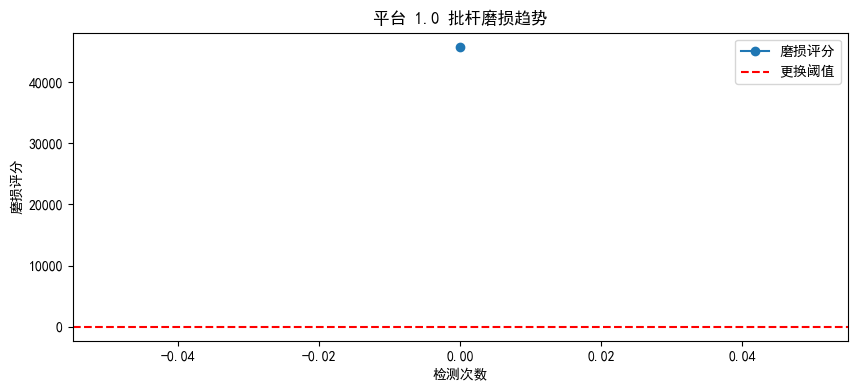

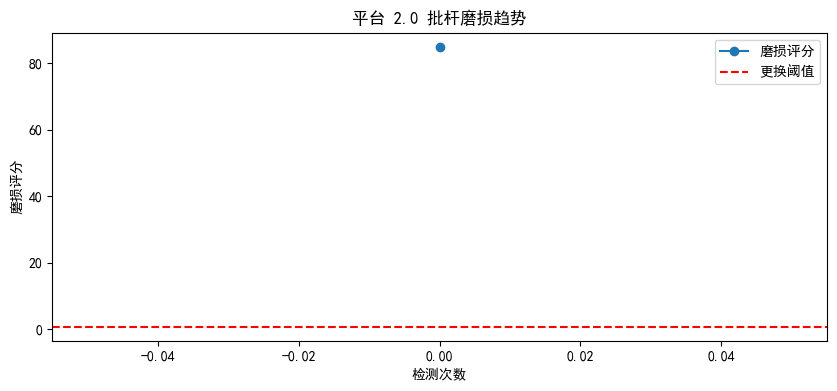

In [40]:
# ÂàõÂª∫ÁõëÊéßÂô®
monitor = ScrewDriverMonitor(df_use)
# ËøêË°åÁõëÊéß
monitor.monitor()

# ÁªòÂà∂Ë∂ãÂäøÂõæ
for platform_id in monitor.batch_state.keys():
    monitor.plot_trend(platform_id)

## 2.2 ÊñπÊ°à‰∫å

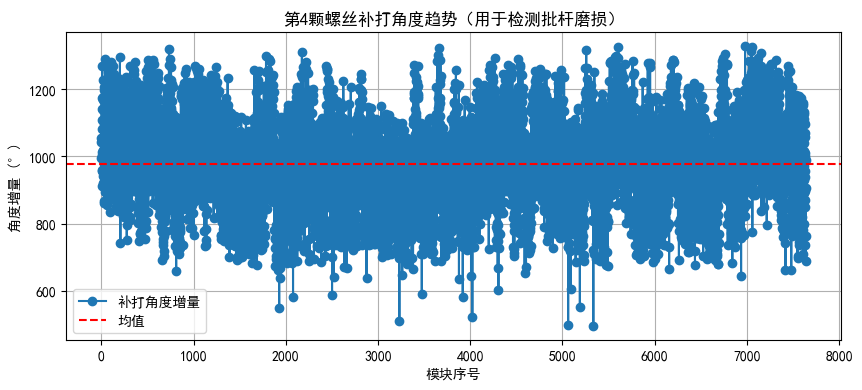

      torque_4full  angle_4full_increment  angle_inc_z  torque_4full_z  \
7630       0.34375                1011.42     0.139479        1.099982   
7631       0.34330                 849.96    -1.030715       -0.772610   
7632       0.34340                1002.78     0.529134       -0.351187   
7633       0.34395                1097.28     0.912975        1.139601   
7634       0.34355                 868.86    -1.052315       -0.292078   
7635       0.34340                 955.26    -0.160752       -0.817818   
7636       0.34325                 762.48    -1.032700       -0.993377   
7637       0.34330                 689.04    -0.823443       -0.215398   
7638       0.34350                 988.74     1.122344        1.125386   
7639       0.34330                 906.66     0.291721       -0.572393   

      health_score recommendation  
7630      0.928422           üü¢ Ê≠£Â∏∏  
7631      0.912415           üü¢ Ê≠£Â∏∏  
7632      0.957763           üü¢ Ê≠£Â∏∏  
7633      0.895105  

In [42]:
# -------------------------------
# 1. Êï∞ÊçÆÂä†ËΩΩ‰∏éÊ∏ÖÊ¥ó
# -------------------------------
# Êï∞ÊçÆÊ∏ÖÊ¥ó
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# ËøáÊª§OKÁªìÊûú
ok_mask = (df['4_halfatlasresult'] == 'OK') & \
          (df['2_fullatlasresult'] == 'OK') & \
          (df['1_fullatlasresult'] == 'OK') & \
          (df['4_fullatlasresult'] == 'OK')
df_use = df[ok_mask].copy()

# -------------------------------
# 2. ÁâπÂæÅÂ∑•Á®ã
# -------------------------------
def extract_features(row):
    features = {
        'torque_4half': row['spk screw 4_half finaltorque'],
        'angle_4half_total': row['spk screw 4_half realangle'],
        
        'torque_2full': row['kc screw 2_full finaltorque'],
        'angle_2full_total': row['kc screw 2_full realangle'],
        'prev_torque_2full': row['kc screw 2_full prevailingtorquemax'],
        
        'torque_1full': row['kc screw 1_full finaltorque'],
        'angle_1full_total': row['kc screw 1_full realangle'],
        
        'torque_4full': row['spk screw 4_full finaltorque'],
        'angle_4full_total': row['spk screw 4_full finalangle'],
        'angle_4full_increment': row['spk screw 4_full totalangle'],  # ÂÖ≥ÈîÆÔºöË°•ÊâìËßíÂ∫¶
        
        'maxpress_spk': row['maxpressspkdata'],
        'bracket_maxpress': row['bracketmaxpress'],
        
        'platform_id': row['s2s3assyplatformid'],
        'install_ptid': row['s2s3installptid'],
    }
    return pd.Series(features)

df_features = df_use.apply(extract_features, axis=1)

# Â§ÑÁêÜÂºÇÂ∏∏ÂÄºÔºàÂ¶ÇË¥üÁöÑ prev_torqueÔºâ
df_features = df_features[df_features['prev_torque_2full'] > 0]

# -------------------------------
# 3. ÊªëÂä®Á™óÂè£Ë∂ãÂäøÂàÜÊûêÔºàÊ†∏ÂøÉÈ¢ÑË≠¶ÈÄªËæëÔºâ
# -------------------------------
window_size = 3  # Â∞èÁ™óÂè£‰æø‰∫éÊºîÁ§∫ÔºåÂÆûÈôÖÂª∫ËÆÆ50~100
df_features = df_features.reset_index(drop=True)

# ËÆ°ÁÆóÊªëÂä®Âπ≥ÂùáÂíåZ-score
df_features['angle_inc_mean'] = df_features['angle_4full_increment'].rolling(window=window_size, min_periods=1).mean()
df_features['angle_inc_std'] = df_features['angle_4full_increment'].rolling(window=window_size, min_periods=1).std()
df_features['angle_inc_z'] = (df_features['angle_4full_increment'] - df_features['angle_inc_mean']) / (df_features['angle_inc_std'] + 1e-6)

df_features['torque_4full_mean'] = df_features['torque_4full'].rolling(window=window_size, min_periods=1).mean()
df_features['torque_4full_std'] = df_features['torque_4full'].rolling(window=window_size, min_periods=1).std()
df_features['torque_4full_z'] = (df_features['torque_4full'] - df_features['torque_4full_mean']) / (df_features['torque_4full_std'] + 1e-6)

# ÂÅ•Â∫∑ËØÑÂàÜÔºàÁÆÄÂåñÁâàÔºâ
df_features['health_score'] = (
    0.6 * (1 - np.abs(df_features['torque_4full_z']) * 0.1).clip(0, 1) +
    0.4 * (1 - np.abs(df_features['angle_inc_z']) * 0.1).clip(0, 1)
)

# -------------------------------
# 4. È¢ÑË≠¶Âà§Êñ≠
# -------------------------------
def judge_wear(row):
    if row['health_score'] < 0.7:
        return 'üî¥ Êõ¥Êç¢'
    elif row['health_score'] < 0.9:
        return 'üü° È¢ÑË≠¶'
    else:
        return 'üü¢ Ê≠£Â∏∏'

df_features['recommendation'] = df_features.apply(judge_wear, axis=1)

# -------------------------------
# 5. ÂèØËßÜÂåñÔºàËßíÂ∫¶Â¢ûÈáèË∂ãÂäøÔºâ
# -------------------------------
plt.figure(figsize=(10, 4))
plt.plot(df_features.index, df_features['angle_4full_increment'], label='Ë°•ÊâìËßíÂ∫¶Â¢ûÈáè', marker='o')
plt.axhline(y=df_features['angle_4full_increment'].mean(), color='r', linestyle='--', label='ÂùáÂÄº')
plt.title('Á¨¨4È¢óËû∫‰∏ùË°•ÊâìËßíÂ∫¶Ë∂ãÂäøÔºàÁî®‰∫éÊ£ÄÊµãÊâπÊùÜÁ£®ÊçüÔºâ')
plt.xlabel('Ê®°ÂùóÂ∫èÂè∑')
plt.ylabel('ËßíÂ∫¶Â¢ûÈáè (¬∞)')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 6. ËæìÂá∫ÁªìÊûú
# -------------------------------
print(df_features[[
    'torque_4full', 'angle_4full_increment', 
    'angle_inc_z', 'torque_4full_z', 
    'health_score', 'recommendation'
]].tail(10))

In [43]:
df_features

torque_4half  angle_4half_total  torque_2full  angle_2full_total  \
0          0.17185            1231.74       0.34345            1369.44   
1          0.17200            1288.98       0.34370            1485.00   
2          0.17240            1299.78       0.34335            1530.90   
3          0.17185            1252.26       0.34350            1273.32   
4          0.17180            1389.96       0.34360            1512.54   
...            ...                ...           ...                ...   
7635       0.17165            1165.86       0.34340            1065.42   
7636       0.17205             994.68       0.34340            1093.50   
7637       0.17225             908.28       0.34360             998.46   
7638       0.17190            1211.22       0.34385             967.68   
7639       0.17160            1125.36       0.34460            1154.52   

      prev_torque_2full  torque_1full  angle_1full_total  torque_4full  \
0               0.08725       0.34370            1415.88       0.34430   
1               0.04190       0.34360            1423.98       0.34325   
2               0.04325       0.34355            1410.48       0.34345   
3               0.02810       0.34360            1218.24       0.34335   
4               0.03185       0.34420            1346.76       0.34385   
...                 ...           ...                ...           ...   
7635            0.09275       0.34370            1139.40       0.34340   
7636            0.06850       0.34395             886.14       0.34325   
7637            0.11730       0.34360             869.94       0.34330   
7638            0.16360       0.34360             866.16       0.34350   
7639            0.14925       0.34365             956.34       0.34330   

      angle_4full_total  angle_4full_increment  ...  platform_id  \
0                 37.26                 996.30  ...          1.0   
1                 26.46                1042.74  ...          1.0   
2                 28.62                1055.70  ...          1.0   
3                 27.00                1005.48  ...          1.0   
4                 57.78                1174.50  ...          1.0   
...                 ...                    ...  ...          ...   
7635              62.10                 955.26  ...          1.0   
7636              41.04                 762.48  ...          1.0   
7637              54.00                 689.04  ...          1.0   
7638              50.22                 988.74  ...          1.0   
7639              54.00                 906.66  ...          1.0   

      install_ptid  angle_inc_mean angle_inc_std  angle_inc_z  \
0             S2-1          996.30           NaN          NaN   
1             S2-1         1019.52     32.838039     0.707107   
2             S3-1         1031.58     31.232983     0.772261   
3             S3-1         1034.64     26.071433    -1.118466   
4             S2-1         1078.56     86.797896     1.105326   
...            ...             ...           ...          ...   
7635          S2-1          973.80    115.333095    -0.160752   
7636          S2-1          862.20     96.562409    -1.032700   
7637          S2-1          802.26    137.495849    -0.823443   
7638          S2-1          813.42    156.208787     1.122344   
7639          S2-1          861.48    154.873971     0.291721   

      torque_4full_mean  torque_4full_std  torque_4full_z  health_score  \
0              0.344300               NaN             NaN           NaN   
1              0.343775          0.000742       -0.706156      0.929346   
2              0.343667          0.000558       -0.387927      0.945834   
3              0.343350          0.000100        0.000000      0.955261   
4              0.343550          0.000265        1.129624      0.888010   
...                 ...               ...             ...           ...   
7635           0.343633          0.000284       -0.817818      0.944501   
7636           0.343400       